# Introduction to location intelligence

In this research and study, we will analyze the food prices in Senegal for different cerales categories.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns

In [2]:
shp_path = "D:/Research/PROJECT/pyexeriences/Geospatial experiences/Book Geographic data with python/data/food_price_regions_senegal/food_price_region_senegal.gpkg"

In [3]:
data = geopandas.read_file(shp_path)

d:\programm files\python 3 8 6\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [4]:
data.head()

,field_1,adm1id,address,city,country,category,catid,cmid,cmname,cmnameshor,...,umid,unit,x,year,result_num,osm_id,display_na,type,latlong,geometry
0,0,2636,Gueule Tapee,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,5,KG,1358208000,2013,0,560764203,"Gueule Tapée, Gueule Tapée-Fass-Colobane, Daka...",place,suburb,POINT (-17.45728 14.68287)
1,1,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,5,KG,1360886400,2013,0,2447109686,"SGBS, Avenue Cheikh Ahmadou Bamba Mbacké, Derk...",amenity,bank,POINT (-17.44808 14.72122)
2,1,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,5,KG,1360886400,2013,1,2447109687,"BOA, Avenue du Président Habib Bourguiba, Cité...",amenity,bank,POINT (-17.44838 14.72078)
3,2,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,5,KG,1363305600,2013,0,2447109686,"SGBS, Avenue Cheikh Ahmadou Bamba Mbacké, Derk...",amenity,bank,POINT (-17.44808 14.72122)
4,2,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,5,KG,1363305600,2013,1,2447109687,"BOA, Avenue du Président Habib Bourguiba, Cité...",amenity,bank,POINT (-17.44838 14.72078)


In [5]:
# Handling missing value
data.isna().sum()

field_1         0
adm1id          0
address         0
city            0
country         0
category        0
catid           0
cmid            0
cmname          0
cmnameshor      0
currency        0
date            0
default       658
interpolat      0
label           0
mktid           0
price           0
ptid            0
scaling         0
sn              0
umid            0
unit            0
x               0
year            0
result_num      0
osm_id          0
display_na      0
type            0
latlong         0
geometry        0
dtype: int64

In [6]:
# Getting latitude and longitude of every city
data['latitude'] = data.geometry.y
data['longitude'] = data.geometry.x

In [7]:
data.head()

,field_1,adm1id,address,city,country,category,catid,cmid,cmname,cmnameshor,...,x,year,result_num,osm_id,display_na,type,latlong,geometry,latitude,longitude
0,0,2636,Gueule Tapee,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,1358208000,2013,0,560764203,"Gueule Tapée, Gueule Tapée-Fass-Colobane, Daka...",place,suburb,POINT (-17.45728 14.68287),14.682867,-17.457283
1,1,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,1360886400,2013,0,2447109686,"SGBS, Avenue Cheikh Ahmadou Bamba Mbacké, Derk...",amenity,bank,POINT (-17.44808 14.72122),14.721220,-17.448079
2,1,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,1360886400,2013,1,2447109687,"BOA, Avenue du Président Habib Bourguiba, Cité...",amenity,bank,POINT (-17.44838 14.72078),14.720784,-17.448379
3,2,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,1363305600,2013,0,2447109686,"SGBS, Avenue Cheikh Ahmadou Bamba Mbacké, Derk...",amenity,bank,POINT (-17.44808 14.72122),14.721220,-17.448079
4,2,2636,Castors,Dakar,Senegal,cereals and tubers,1,158,Maize (imported) - Retail,Maize imp.,...,1363305600,2013,1,2447109687,"BOA, Avenue du Président Habib Bourguiba, Cité...",amenity,bank,POINT (-17.44838 14.72078),14.720784,-17.448379


In [8]:
data.columns

Index(['field_1', 'adm1id', 'address', 'city', 'country', 'category', 'catid',
       'cmid', 'cmname', 'cmnameshor', 'currency', 'date', 'default',
       'interpolat', 'label', 'mktid', 'price', 'ptid', 'scaling', 'sn',
       'umid', 'unit', 'x', 'year', 'result_num', 'osm_id', 'display_na',
       'type', 'latlong', 'geometry', 'latitude', 'longitude'],
      dtype='object')

We will select the most important columns within our data

In [9]:
dataset = data[['date', 'year', 'cmname', 'cmnameshor', 'category', 'price', 'address', 'city', 'country', 'longitude', 'latitude', 'geometry']]

In [10]:
dataset.head()

,date,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
0,1/15/2013,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287)
1,2/15/2013,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2,2/15/2013,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)
3,3/15/2013,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
4,3/15/2013,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)


In [11]:
dataset.columns

Index(['date', 'year', 'cmname', 'cmnameshor', 'category', 'price', 'address',
       'city', 'country', 'longitude', 'latitude', 'geometry'],
      dtype='object')

In [12]:
dataset.shape

(658, 12)

In [13]:
dataset.dtypes

date            object
year            object
cmname          object
cmnameshor      object
category        object
price           object
address         object
city            object
country         object
longitude      float64
latitude       float64
geometry      geometry
dtype: object

In [14]:
# Change price type to float
dataset.price = dataset['price'].astype(np.float)
dataset.price.dtype

d:\programm files\python 3 8 6\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


dtype('float64')

In [15]:
dataset.isna().sum() # Checking the missing value in all columns

date          0
year          0
cmname        0
cmnameshor    0
category      0
price         0
address       0
city          0
country       0
longitude     0
latitude      0
geometry      0
dtype: int64

In [16]:
# convert the 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset.date)

In [17]:
dataset.head()

,date,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
0,2013-01-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287)
1,2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2,2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)
3,2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
4,2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)


In [18]:
# Total years
dataset.year.unique()

array(['2013', '2014', '2015', '2016', '2017', '2018'], dtype=object)

The dataset analyze the total of 6 years from 2013 until to 2018 food price in different locations in Senegal.

In [19]:
(dataset['date'].max() - dataset['date'].min())

Timedelta('2007 days 00:00:00')

The dataset analyze 2007 days almost 6 years mines holidays and weekends 

In [20]:
2007/365 # A year is 365, our result divided with the number of year of the dataset 

5.498630136986302

## The General Variation of Food Price

In [21]:
# To check the variation of the food price over time, let's make the date column as index
dataset.index = dataset['date']

In [22]:
dataset.head()

,date,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
date,,,,,,,,,,,,
2013-01-15,2013-01-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287)
2013-02-15,2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2013-02-15,2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)
2013-03-15,2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2013-03-15,2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)


In [23]:
dataset.columns

Index(['date', 'year', 'cmname', 'cmnameshor', 'category', 'price', 'address',
       'city', 'country', 'longitude', 'latitude', 'geometry'],
      dtype='object')

In [24]:
# let's drop the date column
dataset.drop('date', axis=1, inplace=True)

d:\programm files\python 3 8 6\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
dataset.head()

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
date,,,,,,,,,,,
2013-01-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287)
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122)
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078)


In [26]:
dataset.tail()

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
date,,,,,,,,,,,
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.024736,14.282493,POINT (-15.02474 14.28249)
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.548433,14.101970,POINT (-15.54843 14.10197)
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.547690,14.106511,POINT (-15.54769 14.10651)
2018-07-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,294.0,Kaolack,Kaolack,Senegal,-15.788883,13.963176,POINT (-15.78888 13.96318)
2018-07-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,294.0,Kaolack,Kaolack,Senegal,-16.076391,14.138815,POINT (-16.07639 14.13881)


It seems the data has been collected from day 15 on every month 

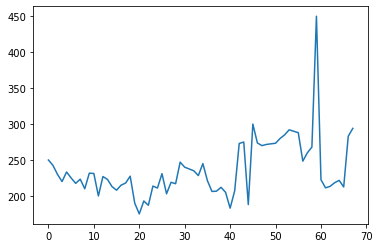

In [27]:
# Check the unique price
plt.plot(dataset.price.unique())

The above result is only useful when checking the highest and lowest price. Let's try to make the output more meaningful by sorting the values

In [28]:
unique_price = dataset.price.unique()
print(sorted(unique_price))

[175.0, 183.0, 187.0, 188.0, 190.0, 193.0, 200.0, 203.0, 205.0, 206.25, 206.6667, 207.0, 208.0, 210.0, 211.0, 211.25, 212.0, 212.5, 213.0, 213.3333, 213.75, 215.0, 217.0, 217.5, 218.0, 218.3333, 219.0, 220.0, 221.25, 221.6667, 222.5, 223.0, 223.3333, 225.0, 227.0, 227.5, 228.3333, 230.0, 231.0, 231.25, 231.6667, 233.3333, 235.0, 237.5, 240.0, 242.5, 245.0, 247.0, 248.4375, 250.0, 260.0, 268.0, 270.0, 271.6667, 272.5, 273.0, 273.3333, 273.75, 275.0, 280.0, 283.0, 285.0, 288.0, 290.0, 292.0, 294.0, 300.0, 450.0]


In [29]:
# It's also possible with dataframe
print(sorted(dataset['price'].unique()))

[175.0, 183.0, 187.0, 188.0, 190.0, 193.0, 200.0, 203.0, 205.0, 206.25, 206.6667, 207.0, 208.0, 210.0, 211.0, 211.25, 212.0, 212.5, 213.0, 213.3333, 213.75, 215.0, 217.0, 217.5, 218.0, 218.3333, 219.0, 220.0, 221.25, 221.6667, 222.5, 223.0, 223.3333, 225.0, 227.0, 227.5, 228.3333, 230.0, 231.0, 231.25, 231.6667, 233.3333, 235.0, 237.5, 240.0, 242.5, 245.0, 247.0, 248.4375, 250.0, 260.0, 268.0, 270.0, 271.6667, 272.5, 273.0, 273.3333, 273.75, 275.0, 280.0, 283.0, 285.0, 288.0, 290.0, 292.0, 294.0, 300.0, 450.0]


The highest price = 450 fcfa (The currancy is Franc cfa, West African Monetary CEDEAO except some countries, but Senegal is using this currancy) and the lowest price is 175

In [30]:
dataset[dataset.price == 450]

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
date,,,,,,,,,,,
2014-06-15,2014,"Rice (ordinary, first quality) - Retail","Rice ordinary, 1st q.",cereals and tubers,450.0,Kedougou,Kedougou,Senegal,-12.185538,12.55709,POINT (-12.18554 12.55709)


In [31]:
dataset[dataset.price == 175]

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry
date,,,,,,,,,,,
2015-12-15,2015,Maize (local) - Retail,Maize loc.,cereals and tubers,175.0,Tambacounda,Tambacounda,Senegal,-13.089176,13.830153,POINT (-13.08918 13.83015)
2015-12-15,2015,Maize (local) - Retail,Maize loc.,cereals and tubers,175.0,Tambacounda,Tambacounda,Senegal,-13.668290,13.769258,POINT (-13.66829 13.76926)
2015-12-15,2015,Maize (local) - Retail,Maize loc.,cereals and tubers,175.0,Tambacounda,Tambacounda,Senegal,-13.672322,13.774000,POINT (-13.67232 13.77400)
2016-01-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Kolda,Kolda,Senegal,-14.939658,12.893608,POINT (-14.93966 12.89361)
2016-01-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Kolda,Kolda,Senegal,-14.142228,12.911966,POINT (-14.14223 12.91197)
2016-03-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Sedhiou,Sedhiou,Senegal,-15.557338,12.709905,POINT (-15.55734 12.70990)
2016-03-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Sedhiou,Sedhiou,Senegal,-15.551334,12.713448,POINT (-15.55133 12.71345)
2016-04-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Sedhiou,Sedhiou,Senegal,-15.557338,12.709905,POINT (-15.55734 12.70990)
2016-04-15,2016,Millet - Retail,Millet,cereals and tubers,175.0,Sedhiou,Sedhiou,Senegal,-15.551334,12.713448,POINT (-15.55133 12.71345)


We can observe the higest price is in Rice in Kedougou which different from the price of other cereales categories, we just wanted to know the locations here

In [32]:
dataset['percentile'] = dataset.groupby(dataset.index)['price'].rank(pct=True)

d:\programm files\python 3 8 6\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [33]:
dataset.head()

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry,percentile
date,,,,,,,,,,,,
2013-01-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287),0.833333
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122),0.700000
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078),0.700000
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122),0.687500
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078),0.687500


<AxesSubplot:xlabel='date'>

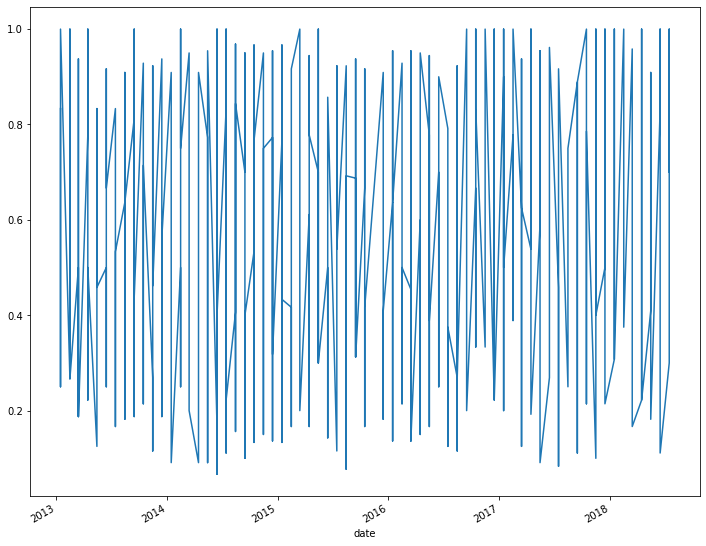

In [34]:
dataset.percentile.plot(figsize=(12, 10))

<AxesSubplot:>

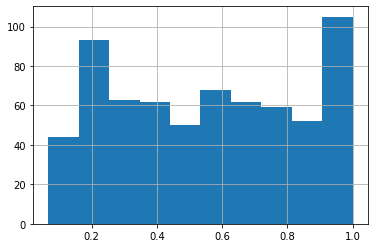

In [35]:
dataset.percentile.hist()

In [36]:
y_percentile = dataset.groupby(dataset.index.year)['price'].rank(pct=True)

In [37]:
high_percentile = y_percentile.sort_values(ascending=False)
print('The high percentile over years: ', high_percentile[:10]);
print('The low percentile over years: ', high_percentile[-10:])

The high percentile over years:  date
2014-06-15    1.000000
2017-11-15    1.000000
2018-06-15    0.992063
2018-07-15    0.992063
2013-02-15    0.987288
2013-04-15    0.987288
2013-03-15    0.987288
2013-03-15    0.987288
2017-07-15    0.982609
2017-07-15    0.982609
Name: price, dtype: float64
The low percentile over years:  date
2016-01-15    0.029167
2014-01-15    0.026316
2014-02-15    0.026316
2014-04-15    0.026316
2014-05-15    0.026316
2014-06-15    0.026316
2014-07-15    0.026316
2015-12-15    0.018349
2015-12-15    0.018349
2015-12-15    0.018349
Name: price, dtype: float64


### Variation of Price over month and year

In [38]:
dataset['month_variation'] = dataset.price.diff()
dataset['year_variation'] = dataset.price.diff(12)

d:\programm files\python 3 8 6\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [39]:
dataset

,year,cmname,cmnameshor,category,price,address,city,country,longitude,latitude,geometry,percentile,month_variation,year_variation
date,,,,,,,,,,,,,,
2013-01-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Gueule Tapee,Dakar,Senegal,-17.457283,14.682867,POINT (-17.45728 14.68287),0.833333,NaN,NaN
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122),0.700000,0.0,NaN
2013-02-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078),0.700000,0.0,NaN
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448079,14.721220,POINT (-17.44808 14.72122),0.687500,0.0,NaN
2013-03-15,2013,Maize (imported) - Retail,Maize imp.,cereals and tubers,250.0,Castors,Dakar,Senegal,-17.448379,14.720784,POINT (-17.44838 14.72078),0.687500,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.024736,14.282493,POINT (-15.02474 14.28249),0.555556,0.0,-35.0
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.548433,14.101970,POINT (-15.54843 14.10197),0.555556,0.0,0.0
2018-06-15,2018,Sorghum - Retail,Sorghum,cereals and tubers,250.0,Kaffrine,Kaffrine,Senegal,-15.547690,14.106511,POINT (-15.54769 14.10651),0.555556,0.0,0.0


In [40]:
dataset.month_variation.unique()

array([      nan,    0.    ,   -7.5   ,    7.5   ,  -20.    ,  -10.    ,
         13.3333,   -8.3333,    5.8333,    1.6667,  -15.    ,   21.6667,
          1.6666,   -2.0833,  -11.25  ,   20.    ,    7.    ,   -2.    ,
        -23.    ,   13.    ,   -5.    ,    5.    ,  -12.    ,   12.    ,
         -7.    ,  -18.    ,   -1.6667,    4.1667,  -17.5   ,   10.    ,
        -25.    ,  -35.    ,   15.    ,    3.    ,   -6.    ,   13.75  ,
         -2.75  ,   14.    ,    6.    ,  -28.    ,   16.    ,  -19.    ,
         17.    ,    8.    ,   22.    ,  -27.    ,  -13.    ,   12.5   ,
         -2.5   ,    3.3333,   -3.3333,  -16.25  ,    0.4167,   -6.6667,
          6.25  ,    3.75  ,    2.    ,  -17.    ,   -8.    ,   25.    ,
         18.    ,   23.    ,  -44.    ,  100.    ,   -1.25  ,   -3.75  ,
          0.8333,    2.5   ,   -1.5625,    1.5625,  175.    , -180.    ,
        -47.5   ,  -13.75  ,   12.0833,   11.6667,    6.6667,  -13.3333,
         -9.1667,   33.    ,   44.    ])

In [41]:
dataset.year_variation.unique()

array([      nan,  -20.    ,  -30.    ,  -16.6667,  -25.    ,  -19.1667,
        -17.5   ,   -5.    ,    5.    ,  -23.3333,    6.6667,   14.1667,
         10.    ,    7.9167,  -10.    ,  -11.6667,  -13.3333,  -11.25  ,
          0.    ,    7.    ,   27.    ,   25.    ,    3.    ,   -7.    ,
        -12.    ,    2.    ,   12.    ,   17.    ,    3.3333,    7.5   ,
         -3.    ,  -13.    ,  -27.5   ,  -15.    ,   20.    ,  -35.    ,
        -17.    ,  -23.    ,   23.75  ,   21.    ,   32.    ,   38.    ,
         44.    ,   19.    ,  -13.75  ,  -11.    ,  -31.    ,   14.    ,
          6.    ,    1.    ,   47.    ,   13.    ,  -47.    ,  -27.    ,
         37.5   ,   15.    ,   -1.6667,   -3.3333,    1.6667,   27.5   ,
         12.5   ,   -3.75  ,  -18.75  ,  -18.3333,  -45.    ,  -37.5   ,
        -31.25  ,    5.75  ,   -1.25  ,   -6.6667,  -37.    ,   50.    ,
         18.    ,   43.    ,   73.    ,  -50.    ,  -85.    ,  -87.    ,
        -75.    ,  100.    ,   75.    ,   73.75  , 

In [42]:
# The variation over the year
var_over_year = dataset.groupby(dataset.index.year)['price'].diff()

<AxesSubplot:xlabel='date'>

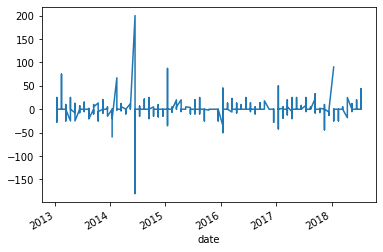

In [43]:
var_over_year.plot()

Between the year of 2014 and 2015 there is a big changes in price happening. But the question is: In which cerales categories and in which region, we can go over and try to reloct
ate the reasons

<AxesSubplot:xlabel='year', ylabel='price'>

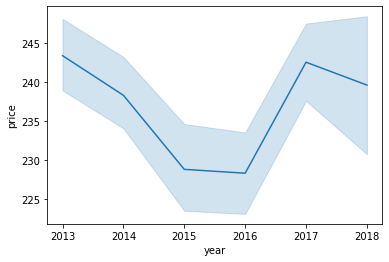

In [44]:
sns.lineplot(data=dataset, x="year", y="price")

Let's find the most important cities for food business with seaborn

<AxesSubplot:xlabel='year', ylabel='price'>

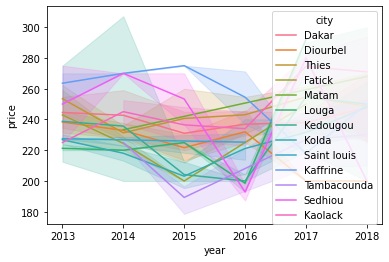

In [45]:
sns.lineplot(data=dataset, x="year", y="price", hue= dataset.city)

<AxesSubplot:xlabel='year', ylabel='cmnameshor'>

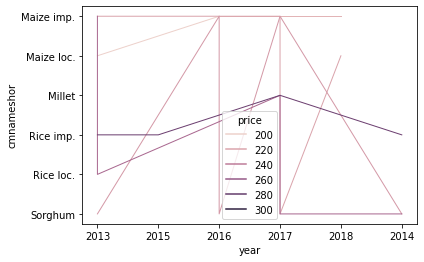

In [46]:
sns.lineplot(
    data=dataset.query("city == 'Dakar'"),
    x="year", y="cmnameshor", hue="price",
    estimator=None, lw=1,
)

In [47]:
sum_price = dataset.groupby('year')['cmname', 'price'].sum()
sum_price

<ipython-input-47-1768111d0136>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_price = dataset.groupby('year')['cmname', 'price'].sum()


,price
year,
2013,28717.5000
2014,31693.2291
2015,24940.8334
2016,27398.7500
2017,27891.0000
2018,15095.0000


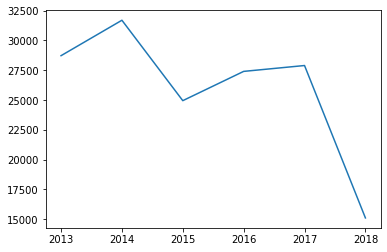

In [48]:
plt.plot(sum_price)

The price has been dropped drammatically from 2017 to 2018

Let's find the most wanted food in Senegal

In [49]:
price_crops = dataset.dissolve('cmnameshor')['price'].sort_values(ascending=False)

In [50]:
# The most wanted cereales in Senegal
price_crops

cmnameshor
Rice ordinary, 1st q.    450.0000
Rice imp.                300.0000
Rice loc.                275.0000
Rice ordinary, 2nd q.    270.0000
Maize imp.               250.0000
Millet                   225.0000
Maize loc.               223.3333
Sorghum                  222.5000
Name: price, dtype: float64

(array([3., 1., 2., 1., 0., 0., 0., 0., 0., 1.]),
 array([222.5 , 245.25, 268.  , 290.75, 313.5 , 336.25, 359.  , 381.75,
        404.5 , 427.25, 450.  ]),
 <BarContainer object of 10 artists>)

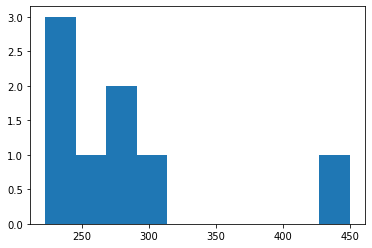

In [51]:
plt.hist(price_crops)

## Visualizing more on the price

<AxesSubplot:xlabel='date'>

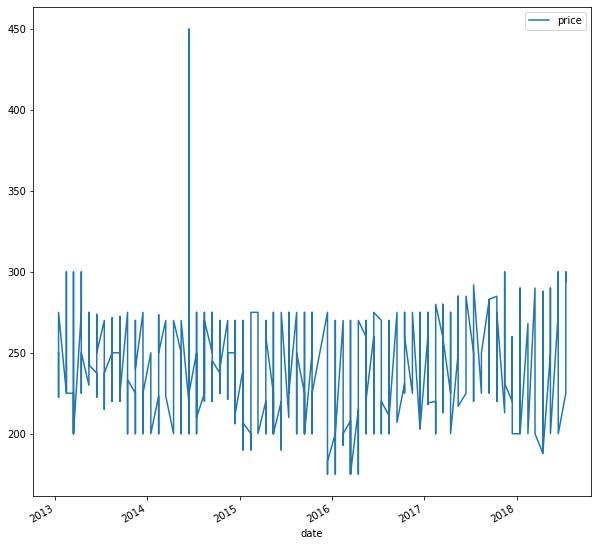

In [52]:
dataset[['year','cmnameshor', 'price']].plot(figsize=(10,10))

<AxesSubplot:>

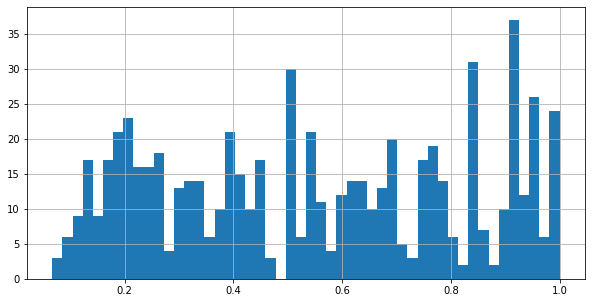

In [53]:
dataset['percentile'].hist(bins = 50, figsize = (10,5)) 

In [54]:
dataset.percentile.describe()

count    658.000000
mean       0.550152
std        0.276764
min        0.066667
25%        0.301923
50%        0.538462
75%        0.791667
max        1.000000
Name: percentile, dtype: float64

We can observe from the figure above the concentration of main cities and local densities in the western side of the country along to the center-west

## Commercial Zones:
The best location for food commercialization

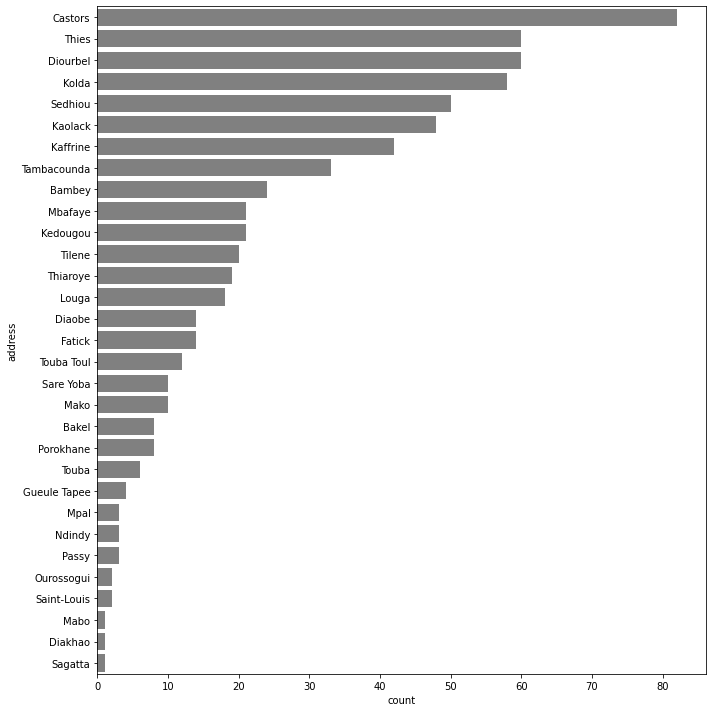

In [55]:
# let’s find the most important city for food commercialization 
fig, ax = plt.subplots(figsize=(10,10))
plot = sns.countplot(y = 'address', 
                     color='grey',
              order = dataset['address'].value_counts().index,
              data=dataset, ax=ax)

plot.figure.savefig('food_price_senegal.png')

plot
plt.tight_layout()
plt.show()

In [56]:
# High to low demand on cities
dataset.city.value_counts()

Dakar          125
Diourbel        93
Thies           93
Kolda           82
Kaolack         56
Sedhiou         50
Kaffrine        43
Tambacounda     41
Kedougou        31
Louga           19
Fatick          18
Saint louis      5
Matam            2
Name: city, dtype: int64

<AxesSubplot:>

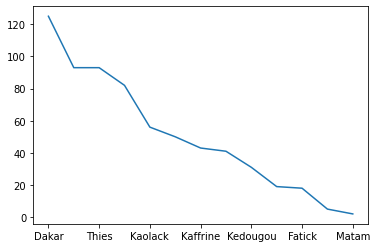

In [57]:
dataset.city.value_counts().plot()

<AxesSubplot:>

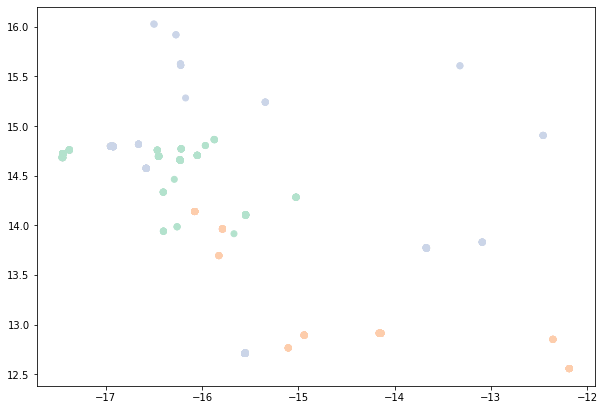

In [58]:
# Mapping price over cities
dataset.plot(column = 'city', scheme='quantiles', cmap='Pastel2', figsize=(10,10))

Let's map the locations of our data into Senegal map

In [59]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [60]:
senegal = world[world.name == 'Senegal']

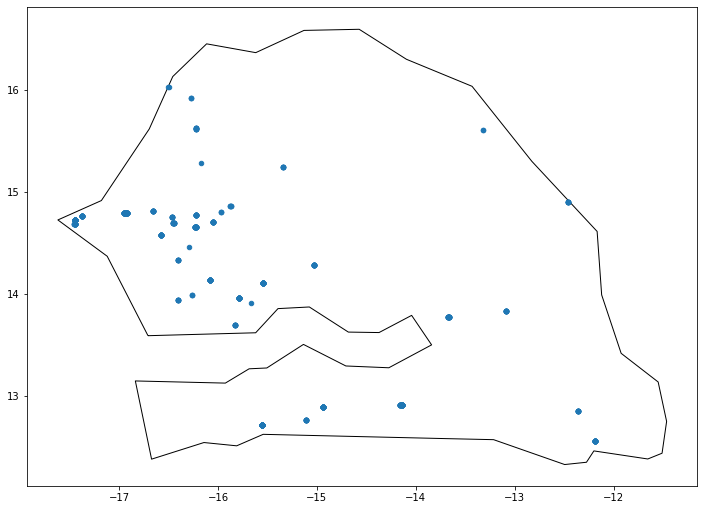

In [61]:
fig, ax = plt.subplots(figsize=(12,10))
senegal.plot(ax=ax, edgecolor = 'black', color='white', figsize=(12, 10))
dataset.plot(markersize=20, ax=ax);
plt.savefig('food_price_map_senegal.png', bbox_inches='tight')

In [62]:
import contextily as ctx
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])


In [63]:
print(ctx.providers.OpenStreetMap.keys())

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])


In [64]:
# add open street map basemap
ctx.add_basemap(ax, crs = dataset.crs, url = ctx.providers.OpenStreetMap.Mapnik)

<ipython-input-64-aa1f9c3384c2>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, crs = dataset.crs, url = ctx.providers.OpenStreetMap.Mapnik)


<Figure size 432x288 with 0 Axes>

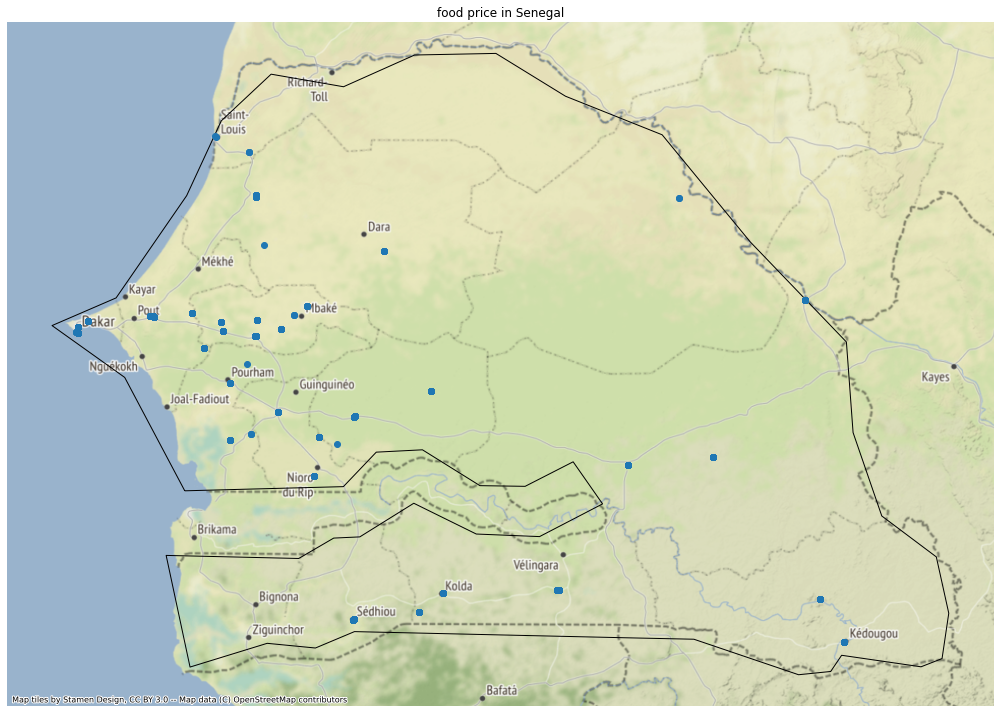

In [65]:
fig, ax = plt.subplots(figsize=(14,12))
senegal.plot(ax=ax, color='None', edgecolor='black')
dataset.plot(ax=ax)
ax.set(title='food price in Senegal') # add a title to the map
ax.set_axis_off() # remove the axis ticks 
plt.tight_layout() # adjust the padding between figure edges
plt.savefig('foodpricesenegal_conf_OSM_Map.png')# Save the map as an image
ctx.add_basemap(ax, crs=dataset.crs.to_string())

What we can understand from above map is the shape of Senegal from geopandas dataset in not well fitting with the map from contextily available map datasets

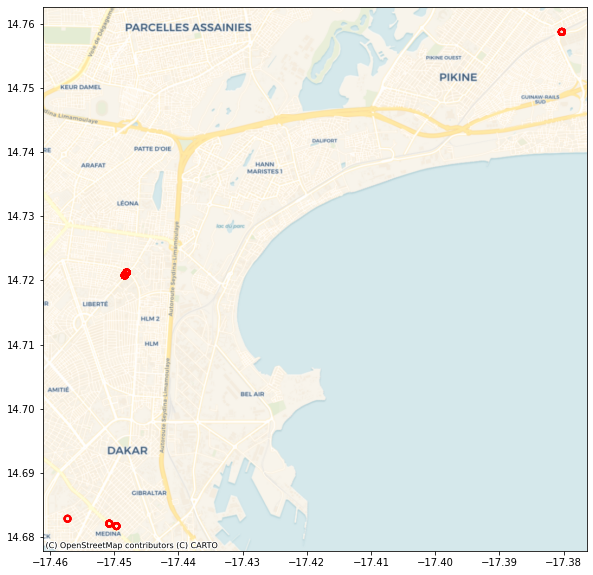

In [66]:
# The locations in Dakar, the main city and capital of Senegal
sen = dataset.query("city == 'Dakar'")
ax = sen.plot(facecolor="none",
                   edgecolor="red",
                   linewidth=2, figsize=(12, 10)
                  )
ctx.add_basemap(ax,
               crs=sen.crs.to_string(),
               source=ctx.providers.CartoDB.Voyager
              )

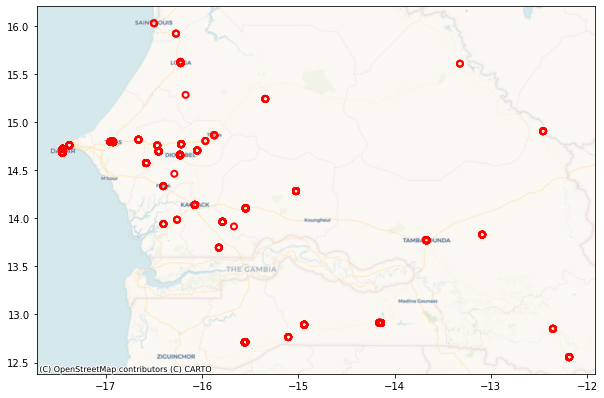

In [67]:
ax = dataset.plot(facecolor="none",
                   edgecolor="red",
                   linewidth=2, figsize=(10, 10)
                  )
ctx.add_basemap(ax,
               crs=sen.crs.to_string(),
               source=ctx.providers.CartoDB.Voyager
              )

Mapping with Folium Library

In [68]:
m = folium.Map (
    location = [14.414808661893874, -14.506641213432777],
    tiles='Stamen Toner',
    zoom_start = 8
)
folium.GeoJson(data).add_to(m)
m


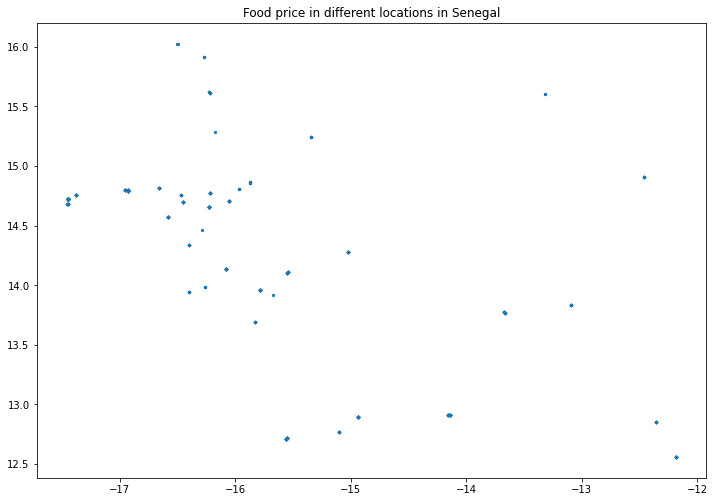

In [69]:
fig, ax = plt.subplots(figsize=(12,10))
dataset.plot(markersize=5,ax=ax);
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title('Food price in different locations in Senegal')
plt.show()

In [70]:
data.cmname.unique() # unique value for food categories

array(['Maize (imported) - Retail', 'Maize (local) - Retail',
       'Millet - Retail', 'Rice (imported) - Retail',
       'Rice (local) - Retail', 'Rice (ordinary, first quality) - Retail',
       'Rice (ordinary, second quality) - Retail', 'Sorghum - Retail'],
      dtype=object)

In [71]:
data.cmnameshor.unique()

array(['Maize imp.', 'Maize loc.', 'Millet', 'Rice imp.', 'Rice loc.',
       'Rice ordinary, 1st q.', 'Rice ordinary, 2nd q.', 'Sorghum'],
      dtype=object)

In [72]:
local_rice = data[data['cmnameshor']== 'Rice loc.']

In [73]:
imp_rice = data[data['cmnameshor']== 'Rice imp.']

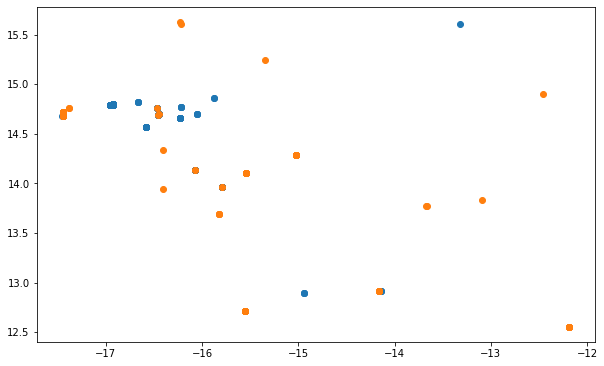

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
local_rice.plot(ax=ax)
imp_rice.plot(ax=ax)
plt.show()

The imported rice is much more consomable in Senegal than the local cultivated rice.

In [75]:
folium.GeoJson(local_rice).add_to(m)
folium.GeoJson(imp_rice, popup='Imported rice').add_to(m)
m


In [76]:
from folium.plugins import FastMarkerCluster
lons = data['longitude'] 
lats = data['latitude']
m1 = folium.Map(
    location = [np.mean(data.latitude), np.mean(data.longitude)],
    tiles= 'Stamen Toner',
    zoom_start=6
    )
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m1)
folium.LayerControl().add_to(m1)
m1